In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
global_font={'family' : 'NanumSquare Neo OTF Bold','size' : 12 , 'weight' : 'bold'}
#폰트설정
mpl.rc('font', **global_font)

In [2]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col="ResponseId")

In [3]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [4]:
schema_raw = pd.read_csv('datas/survey_results_schema.csv',index_col="qname")["question"]

In [5]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

## schema_raw ->설문조사의 질문에 대한 내용이 들어있다

In [6]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [7]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [8]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

## 표현되는  column과 row의 범위를 변경합니다.

In [9]:
# 표현되는  column과 row의 범위를 변경합니다.
# row에 대해 한번에 출력할 수있는 크기를 조절합니다.
pd.set_option('display.max_columns',78)
pd.set_option('display.max_rows',78)

In [10]:
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,

In [11]:
selected_columns=[
    #인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [12]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [14]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [15]:
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [16]:
count_nan = survey_df["YearsCode"]

In [17]:
count_nan.isnull().sum()

1937

In [18]:
def count_nan(series) :
    return len(series) - series.count()
count_nan(survey_df["YearsCode"])

1937

In [19]:
survey_df["YearsCode"].replace('Less than 1 year',0,inplace=True)
survey_df["YearsCode"].replace('More than 50 years',51,inplace=True)
survey_df["YearsCode"] = survey_df["YearsCode"].astype("f")

In [20]:
survey_df["YearsCode"]

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float32

In [21]:
print(schema_raw["YearsCodePro"])
count_nan(survey_df["YearsCodePro"])
survey_df['YearsCodePro'].value_counts()

NOT including education, how many years have you coded professionally (as a part of your work)?


3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [22]:
survey_df["YearsCodePro"].replace('Less than 1 year',0,inplace=True)
survey_df["YearsCodePro"].replace('More than 50 years',51,inplace=True)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype("f")

In [23]:
survey_df["YearsCodePro"].dtypes

dtype('float32')

In [24]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.950397,8.712011,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [25]:
survey_df2 = survey_raw_df[selected_columns].copy

In [26]:
survey_df2

<bound method NDFrame.copy of                                                       Country  \
ResponseId                                                      
1                                                         NaN   
2                                                      Canada   
3           United Kingdom of Great Britain and Northern I...   
4                                                      Israel   
5                                    United States of America   
...                                                       ...   
73264                                                 Nigeria   
73265                                United States of America   
73266                                United States of America   
73267       United Kingdom of Great Britain and Northern I...   
73268                                                  Canada   

                        Age Gender  \
ResponseId                           
1                       NaN    NaN   
2         

# pd.to_numeric()

In [27]:
# pd.to_numeric() 메서드에서 error값을 "coerce"으로 하면 숫자로 바꿀 수 없는 값을 
survey_df2['YearsCode'] = pd.to_numeric(survey_df2["YearsCode"], errors='coerce')
survey_df2['YearsCodePro'] = pd.to_numeric(survey_df2["YearsCodePro"], errors='coerce')

TypeError: 'method' object is not subscriptable

In [28]:
schema_raw["Gender"]

'Which of the following describe you, if any? Please check all that apply.'

In [29]:
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

## 반전을 주었을 때 True가 되어야한다. ?

In [30]:
# where 첫번째 인자 값의 False값을 변경해준다

In [31]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)

In [32]:
survey_df["Gender"].str.contains(";", na=False)

ResponseId
1        False
2        False
3        False
4        False
5        False
         ...  
73264    False
73265    False
73266    False
73267    False
73268    False
Name: Gender, Length: 73268, dtype: bool

In [33]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [34]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14 #폰트크기
mpl.rcParams['figure.figsize']=(9,5) #figure의 사이즈
mpl.rcParams['figure.facecolor']='#00000000' # 배경색상

In [35]:
mpl.rcParams["axes.facecolor"] = "white"

In [36]:
#matplotlib의 스타일 지정
print(plt.style.available) #사용가능한 스타일

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [40]:
plt.style.use("default") #default = 원래 스타일 적용

In [38]:
plt.style.use('Solarize_Light2') #"원하는 스타일" => 스타일 적용

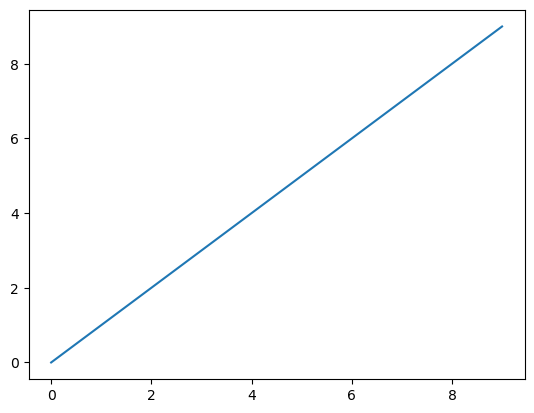

In [41]:
# 스타일 확인용
plt.plot(range(10))
plt.show()

In [42]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [43]:
survey_df["Country"].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [44]:
survey_df["Country"].value_counts().head(15)

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

In [45]:
"""
plt.title('응답자의 지역')
plt.xticks(rotation=90)
sns.barplot(data = Country_s, x=)
plt.ylavel('응답자의 수')
plt.show()"""

"\nplt.title('응답자의 지역')\nplt.xticks(rotation=90)\nsns.barplot(data = Country_s, x=)\nplt.ylavel('응답자의 수')\nplt.show()"

In [46]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

NanumGothic
NanumBarunGothic YetHangul
NanumMyeongjo Eco
NanumBarunpen
NanumBarunGothicOTF
Noto Sans KR
NanumBarunGothicOTF
Nanum Pen Script OTF
NanumBarunGothic
NanumMyeongjo Eco
NanumBarunGothicOTF
NanumSquare Neo ExtraBold
D2Coding ligature
NanumBarunpenOTF
NanumSquareRound
NanumSquareOTF
NanumSquare Neo OTF Bold
Nanum Brush Script
Nanum Pen Script
NanumSquare_ac
NanumSquare Neo OTF ExtraBold
NanumSquare Neo OTF Regular
NanumSquare
NanumBarunGothicOTF YetHangul
NanumGothic
NanumSquare
Noto Sans KR
NanumSquareOTF_ac
NanumGothic Eco
NanumSquare_ac
Noto Sans KR
NanumSquare_ac
NanumGothic
NanumBarunGothicOTF
NanumSquare
NanumSquare Neo Bold
NanumSquareOTF
NanumSquare
D2Coding ligature
NanumSquareRoundOTF
NanumGothic Eco
NanumSquareOTF_ac
Nanum Brush Script OTF
Noto Sans KR
NanumGothicOTF Eco
NanumSquareOTF_ac
NanumSquareOTF
NanumMyeongjoOTF
NanumMyeongjo
NanumGothic Eco
NanumMyeongjoOTF
Noto Sans KR
NanumSquareRoundOTF
NanumSquareOTF_ac
NanumSquare_ac
NanumMyeongjoOTF YetHangul
NanumBar

In [47]:
# Set font family globally
mpl.rcParams['font.family'] = 'NanumSquare Neo OTF Bold'
print(mpl.rcParams['font.family'])

['NanumSquare Neo OTF Bold']


In [55]:
survey_df["Country"].value_counts().head(15)

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

In [56]:
top_countries = survey_df["Country"].value_counts().head(15)

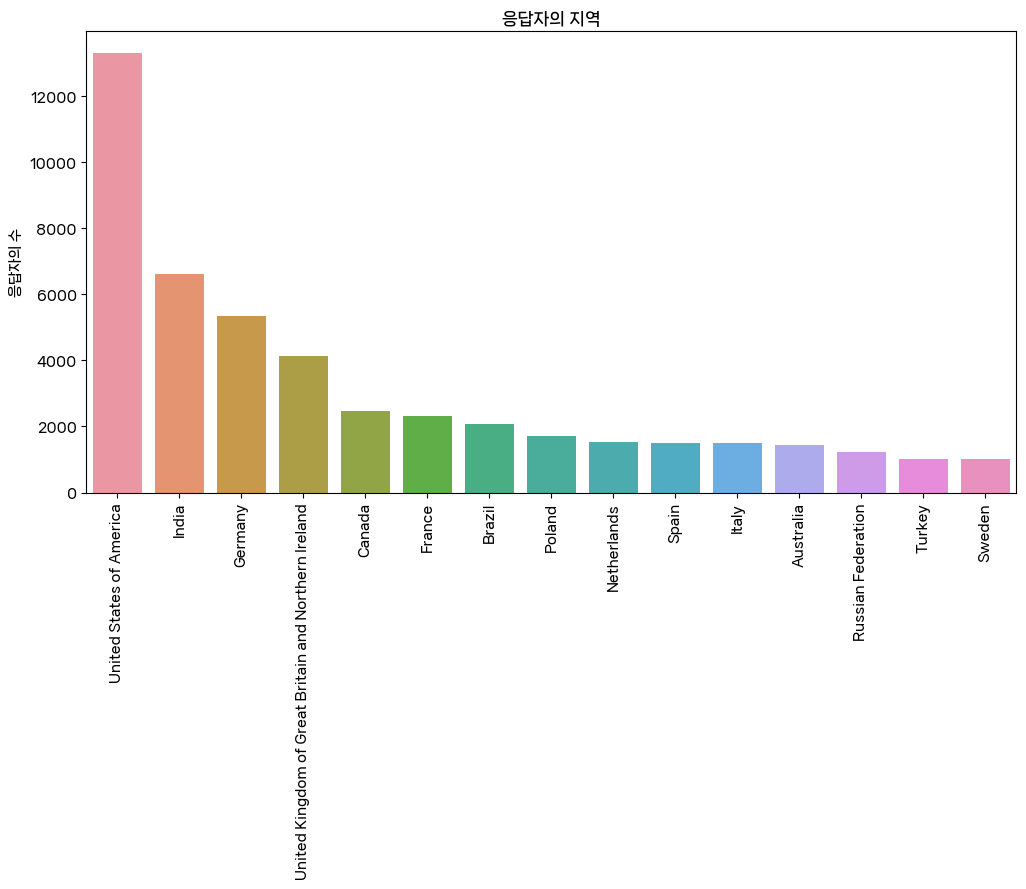

In [57]:
#figure 사이즈를 12x6으로 설정합니다.
plt.figure(figsize=(12,6))
plt.title('응답자의 지역')
#rotation = 90은 글자를 반시계 방향으로 90도 회전시킵니다.
plt.xticks(rotation=90)
sns.barplot(x = top_countries.index, y = top_countries)
plt.ylabel('응답자의 수')
plt.show()

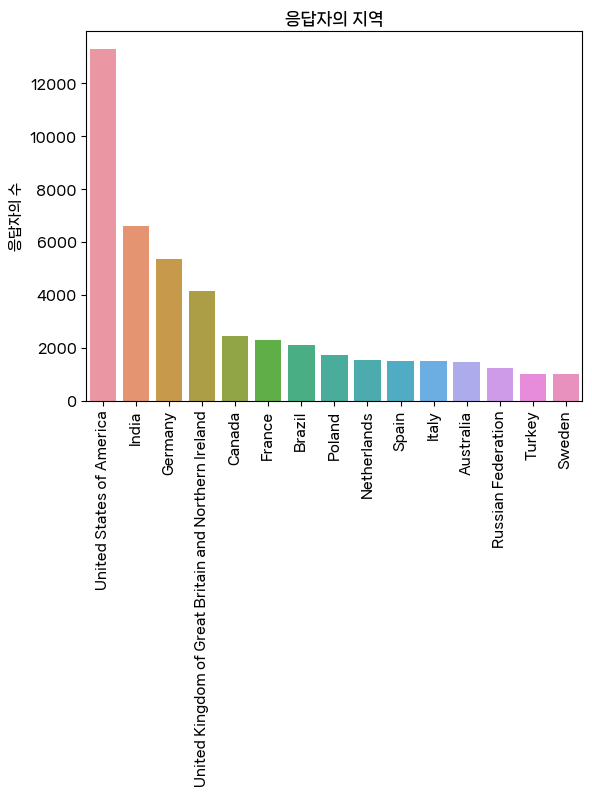

In [67]:
plt.title('응답자의 지역')
#rotation = 90은 글자를 반시계 방향으로 90도 회전시킵니다.
plt.xticks(rotation=90)
sns.barplot(x = top_countries.index, y = top_countries.values)
plt.ylabel('응답자의 수')
plt.show()

In [66]:
top_countries.values

array([13321,  6618,  5342,  4132,  2459,  2306,  2088,  1719,  1539,
        1511,  1504,  1449,  1215,  1014,  1008], dtype=int64)

In [68]:
schema_raw["Age"]

'What is your age?'

In [74]:
count_nan(survey_df['Age'])

3011

In [84]:
survey_df['Age']

ResponseId
1                    NaN
2                    NaN
3        25-34 years old
4        35-44 years old
5        25-34 years old
              ...       
73264    25-34 years old
73265    25-34 years old
73266    55-64 years old
73267    55-64 years old
73268    25-34 years old
Name: Age, Length: 73268, dtype: object

In [76]:
age_counts = survey_df['Age'].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [77]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [78]:
survey_df["Age"].nunique()

8

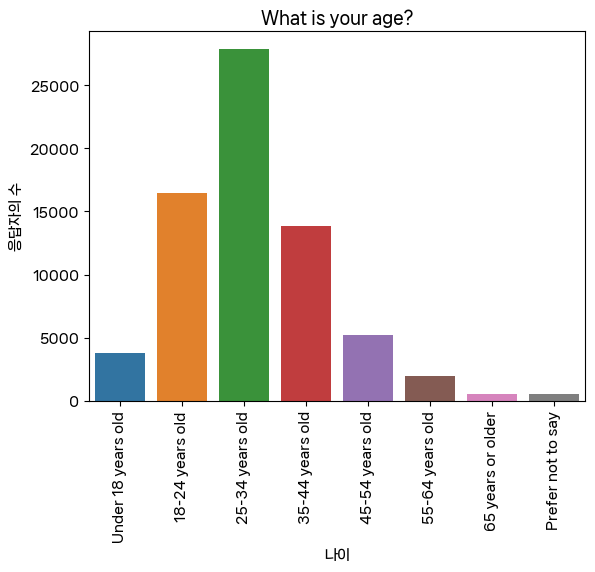

In [86]:
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]    
plt.title('What is your age?')
#rotation = 90은 글자를 반시계 방향으로 90도 회전시킵니다.
plt.xticks(rotation=90)
sns.barplot(x = age_counts.index, y = age_counts, order=age_order)
plt.ylabel('응답자의 수')
plt.xlabel('나이')
plt.show()

In [87]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [88]:
gender_counts=survey_df['Gender'].value_counts(True)
gender_counts

Man                                                  0.920839
Woman                                                0.048446
Prefer not to say                                    0.016704
Non-binary, genderqueer, or gender non-conforming    0.010034
Or, in your own words:                               0.003977
Name: Gender, dtype: float64

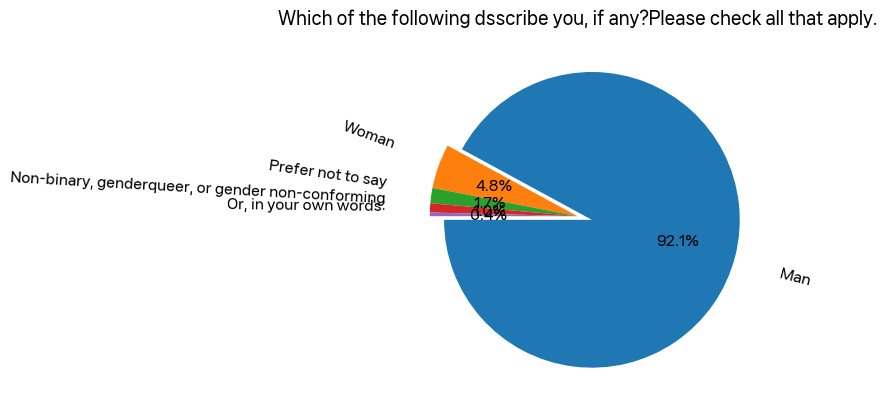

In [102]:
plt.title("Which of the following dsscribe you, if any?Please check all that apply.")
plt.pie(gender_counts, explode = (0.1,0,0,0,0),autopct='%1.1f%%',
        labels=gender_counts.index, labeldistance=1.3,rotatelabels=True,startangle=180)
plt.show()

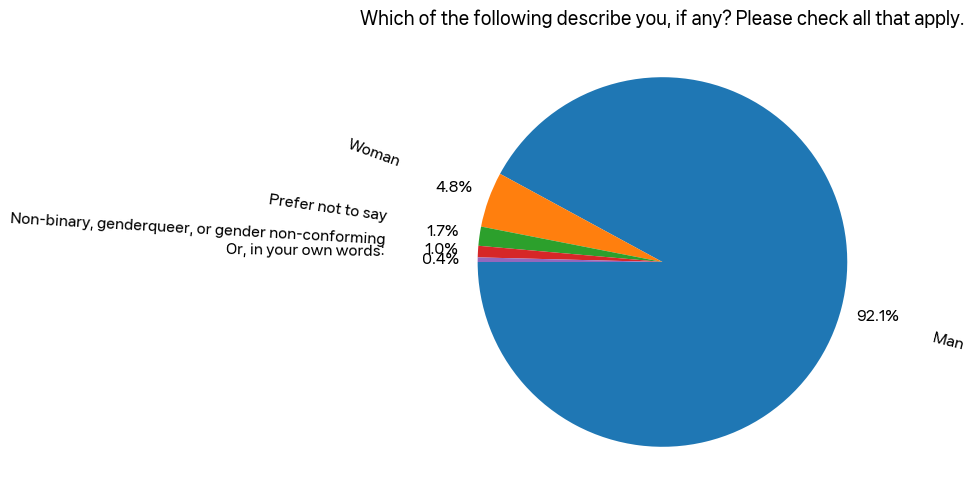

In [104]:
plt.figure(figsize=(6, 6))
plt.title(schema_raw.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180,
        labeldistance=1.5, pctdistance=1.2, rotatelabels=True)
# labeldistance: label의 pie 차트 중심으로부터의 거리
# pctdistance: 값의 pie 차트 중심으로부터의 거리
# rotatelabels: True일 때 label을 회전시켜서 출력합니다.
plt.show()

In [108]:
schema_raw["EdLevel"] #가장 높은 레벨의 교육 = 학력

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [114]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

In [110]:
EL = survey_df["EdLevel"].value_counts()

In [141]:
EL.sum()

70879

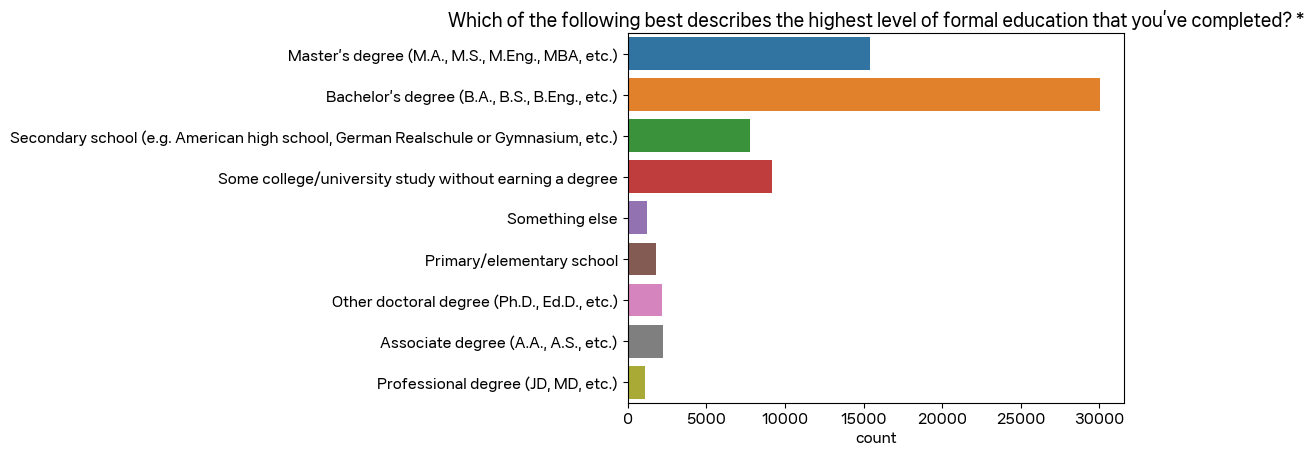

In [116]:
order=[
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
    "Some college/university study without earning a degree",
    "Something else","Primary/elementary school",
    "Other doctoral degree (Ph.D., Ed.D., etc.)",
    "Associate degree (A.A., A.S., etc.)",
    "Professional degree (JD, MD, etc.)"
]
#figure 사이즈를 12x6으로 설정합니다.
#plt.figure(figsize=(12,6))
plt.title(schema_raw["EdLevel"])
#rotation = 90은 글자를 반시계 방향으로 90도 회전시킵니다.
#plt.xticks(rotation=90)
sns.barplot(y = EL.index, x = EL, order=order)
plt.xlabel('count')
plt.show()

In [124]:
survey_df["EdLevel"].unique()

array([nan, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)'], dtype=object)

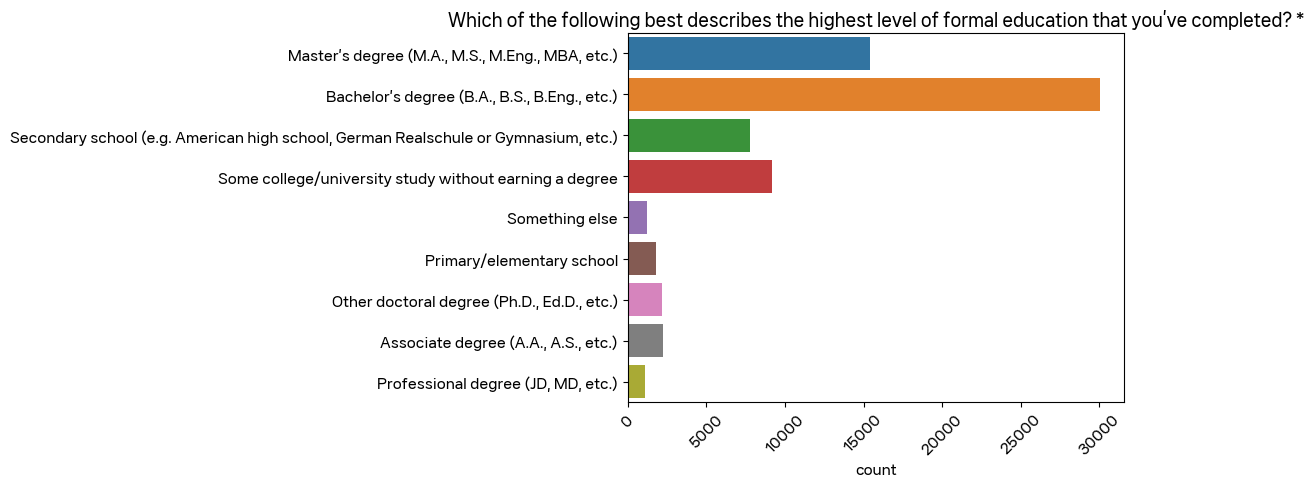

In [140]:
order=[
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
    "Some college/university study without earning a degree",
    "Something else","Primary/elementary school",
    "Other doctoral degree (Ph.D., Ed.D., etc.)",
    "Associate degree (A.A., A.S., etc.)",
    "Professional degree (JD, MD, etc.)"
]
#figure 사이즈를 12x6으로 설정합니다.
#plt.figure(figsize=(12,6))
plt.title(schema_raw["EdLevel"])
#rotation = 90은 글자를 반시계 방향으로 90도 회전시킵니다.
plt.xticks(rotation=45)
sns.barplot(x = survey_df["EdLevel"].value_counts(), y = survey_df["EdLevel"].value_counts().index, order=order)
plt.xlabel('count')
plt.show()

In [146]:
EL_pct = survey_df.EdLevel.value_counts(True) * 100
EL_pct

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

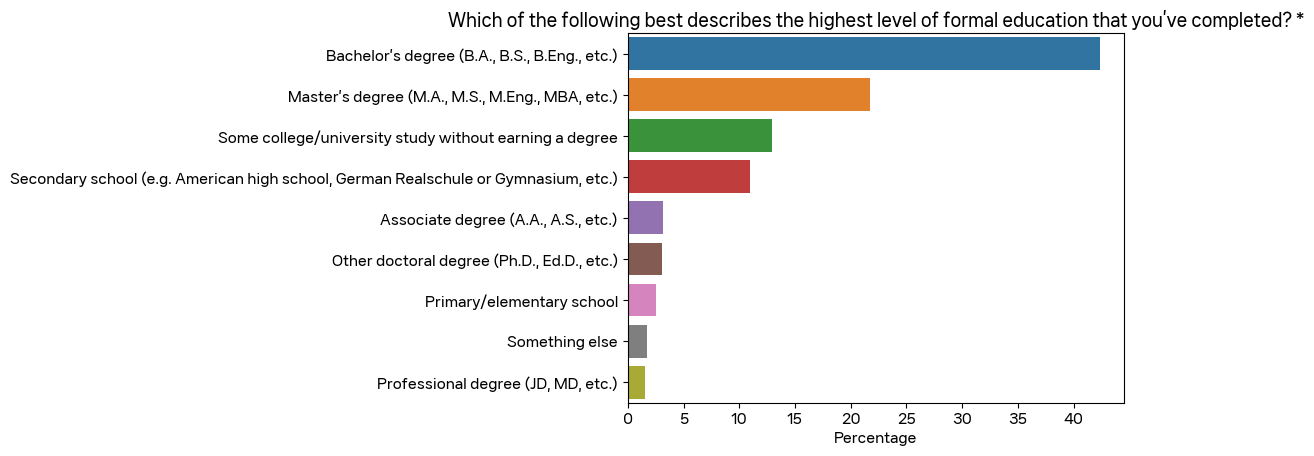

In [152]:
plt.title(schema_raw["EdLevel"])
sns.barplot(x = EL_pct, y = EL.index)
plt.xlabel('Percentage')
plt.show()

In [153]:
schema_raw["Employment"]

'Which of the following best describes your current employment status?'

In [159]:
Em_df = survey_df["Employment"].value_counts(True,ascending=False).head(15)

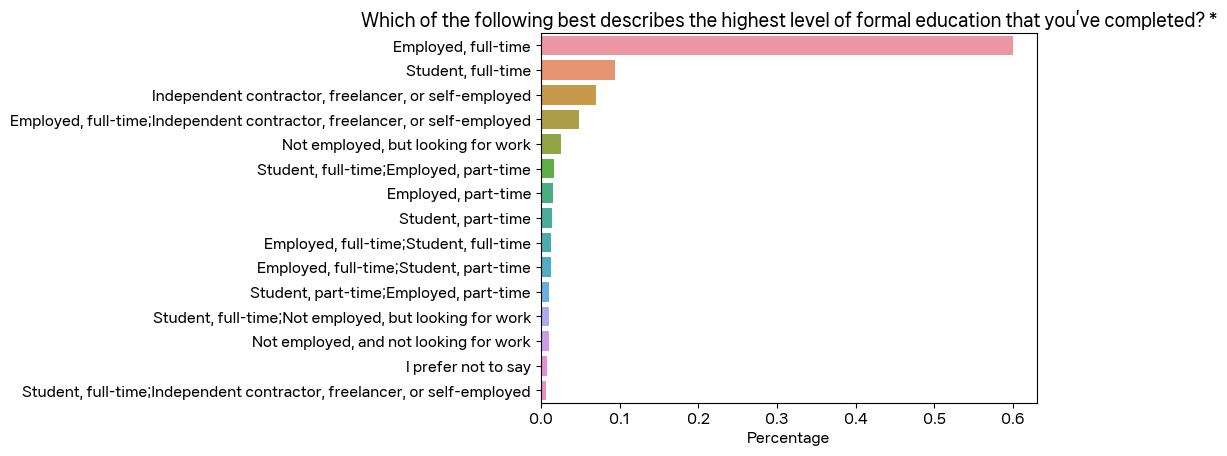

In [160]:
plt.title(schema_raw["EdLevel"])
sns.barplot(x = Em_df, y = Em_df.index)
plt.xlabel('Percentage')
plt.show()

In [177]:
#응답자가 맡은 역할에 대한 DevType
schema_raw.DevType
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

In [176]:
survey_df.DevType[3].split(';')

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability']

In [ ]:
def split_multicolumn(a):
    A=pd.Series()
    try:
        for k,v in a.items():
            for i in range(k.split(';').count()):
                A[k.split(';').count()[i]]
        

dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

In [178]:
def split_multicolumn(s):
    s.dropna(inplace=True)
    df = pd.DataFrame(s)
    for x in s.str.split(';').items():
        for y in x[1]:
            df.loc[x[0],y]=True
    df.fillna(False,inplace=True)
    return df
    
split_multicolumn(survey_df.DevType)

,DevType,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,Data scientist or machine learning specialist;...,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,"Developer, full-stack",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,"Developer, front-end;Developer, full-stack;Dev...",False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Developer, full-stack;Student",False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,"Developer, back-end",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,"Developer, back-end",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,Data scientist or machine learning specialist,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,"Developer, full-stack;Developer, desktop or en...",False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
